In [1]:
import time
import pandas
import scipy.signal
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics


In [3]:
rifeco = pandas.read_csv('../100x100xdiv.csv')
#rifeco.head()
print(rifeco.columns)
#print(rifeco)
rifeco.iloc[21]

Index(['gameId', 'region', 'summonerName', 'tier', 'rank', 'tierRank', 'wins',
       'losses', 'win', 'lane', 'role', 'championId', 'spell1Id', 'spell2Id',
       'kills', 'deaths', 'assists', 'largestKillingSpree', 'largestMultiKill',
       'killingSprees', 'longestTimeSpentLiving', 'doubleKills', 'tripleKills',
       'quadraKills', 'pentaKills', 'totalDamageDealt',
       'totalDamageDealtToChampions', 'totalHeal', 'totalUnitsHealed',
       'damageDealtToObjectives', 'timeCCingOthers', 'totalDamageTaken',
       'totalMinionsKilled', 'goldEarned', 'goldSpent', 'visionScore',
       'team-firstBlood', 'team-firstTower', 'team-firstInhibitor',
       'team-firstBaron', 'team-firstDragon', 'team-firstRiftHerald',
       'team-towerKills', 'team-inhibitorKills', 'team-baronKills',
       'team-dragonKills', 'team-vilemawKills', 'team-riftHeraldKills'],
      dtype='object')


gameId                             983703466
region                                   la2
summonerName                   PaposDelCente
tier                                    IRON
rank                                      II
tierRank                             IRON-II
wins                                       9
losses                                    14
win                                    False
lane                                  BOTTOM
role                               DUO_CARRY
championId                               222
spell1Id                                   4
spell2Id                                   7
kills                                      5
deaths                                    14
assists                                    2
largestKillingSpree                        2
largestMultiKill                           1
killingSprees                              2
longestTimeSpentLiving                   215
doubleKills                                0
tripleKill

In [4]:
rifeco.describe()

,gameId,wins,losses,championId,spell1Id,spell2Id,kills,deaths,assists,largestKillingSpree,...,totalMinionsKilled,goldEarned,goldSpent,visionScore,team-towerKills,team-inhibitorKills,team-baronKills,team-dragonKills,team-vilemawKills,team-riftHeraldKills
count,5.920200e+04,59202.000000,59202.000000,59202.000000,59202.000000,59202.000000,59202.000000,59202.000000,59202.000000,59202.000000,...,59202.000000,59202.000000,59202.000000,59202.000000,59202.000000,59202.000000,59202.000000,59202.000000,59202.0,59202.000000
mean,1.038282e+09,83.201277,82.534289,150.954360,9.844684,10.754130,6.596770,6.504797,9.395189,2.788200,...,90.310091,11237.845292,10242.796595,18.339853,4.798503,0.904007,0.327252,1.601821,0.0,0.618493
std,3.746844e+07,101.705956,96.674801,182.520168,11.112909,11.154853,5.450518,3.695508,7.491028,2.791243,...,67.846932,4350.915131,4209.766167,17.338924,3.641224,1.164553,0.584043,1.486428,0.0,0.729989
min,7.230876e+08,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,664.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.032229e+09,14.000000,18.000000,40.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,...,32.000000,8293.000000,7450.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.053939e+09,47.000000,48.000000,89.000000,4.000000,7.000000,5.000000,6.000000,8.000000,2.000000,...,73.000000,10988.000000,10025.000000,15.000000,4.000000,0.000000,0.000000,1.000000,0.0,0.000000
75%,1.059350e+09,108.000000,106.000000,163.000000,12.000000,14.000000,9.000000,9.000000,13.000000,4.000000,...,142.000000,13879.000000,12785.000000,25.000000,8.000000,2.000000,1.000000,3.000000,0.0,1.000000
max,1.062623e+09,811.000000,844.000000,887.000000,54.000000,54.000000,64.000000,52.000000,73.000000,64.000000,...,443.000000,39251.000000,56844.000000,190.000000,11.000000,13.000000,4.000000,7.000000,0.0,2.000000


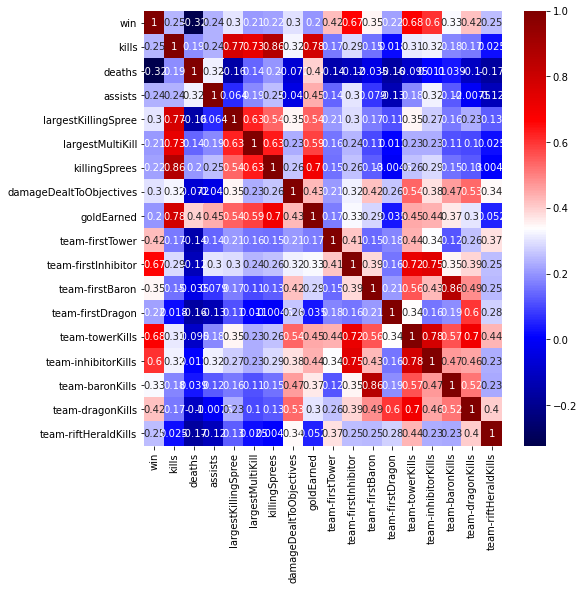

In [6]:
corrmat = rifeco.corr()
top_corr_features = corrmat.index[abs(corrmat["win"]) > 0.2]

plt.figure(figsize = (10,10))
ax = sns.heatmap(rifeco[top_corr_features].corr(),annot=True,cmap="seismic")
plt.show()

In [5]:
rifeco.dtypes

gameId                           int64
region                          object
summonerName                    object
tier                            object
rank                            object
wins                             int64
losses                           int64
win                               bool
lane                            object
role                            object
championId                       int64
spell1Id                         int64
spell2Id                         int64
kills                            int64
deaths                           int64
assists                          int64
largestKillingSpree              int64
largestMultiKill                 int64
killingSprees                    int64
longestTimeSpentLiving           int64
doubleKills                      int64
tripleKills                      int64
quadraKills                      int64
pentaKills                       int64
totalDamageDealt                 int64
totalDamageDealtToChampio

In [26]:
#data segregation
rifeco.dropna(inplace=True)
X = rifeco.drop(['tier', 'rank', 'region', 'summonerName', 'lane', 'role'], axis=1).values
y = rifeco[['tier']].to_numpy().ravel()

#Normalization
#X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2) # 20% or n% of the data.

In [27]:
clf_rf = RandomForestClassifier(max_depth=None)
clf_svc = SVC(gamma=1.5, C=1, probability = True)
fig= plt.figure(figsize=(12,8))
ax= fig.add_subplot(111)

start = time.time()
# fit the model using the training set

clf_svc.fit(X_train, y_train)
end = time.time()
# compute the mean accuracy of the classifier
score = clf_svc.score(X_test, y_test)
end2 = time.time()
# compute ROC curve
y_test_pred = clf_svc.predict_proba(X_test)[:, 1]
print(y_test, y_test_pred)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred, pos_label=1)
auc = metrics.roc_auc_score(y_test, y_test_pred, multi_class='ovr', average="macro")
acc = metrics.accuracy_score(y_test, y_test_pred >= 0.5)
f1 = metrics.f1_score(y_test, y_test_pred >= 0.5)
ax.set_xlim(-.05, 1.05)
ax.set_ylim(-.05, 1.05)
ax.set_xticks(())
ax.set_yticks(())
ax.text(0.95, 0.3, "Acc: %.2f" % acc, ha = 'right')
ax.text(0.95, 0.2, "F1-score: %.2f" % f1, ha = 'right')
ax.text(0.95, 0.1, "AUC: %.2f" % auc, ha = 'right')
ax.plot(fpr, tpr, lw = 5)
idx = np.argmin(np.abs(thresholds - 0.5))
ax.scatter(fpr[idx], tpr[idx], marker = 'o', c = 'r')
print(str(end-start),str(end2 - end))

C:\Users\matia\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
          tier
1700    SILVER
4933    BRONZE
1614    SILVER
2332   DIAMOND
3913    BRONZE
...        ...
4668   DIAMOND
5668  PLATINUM
1513    BRONZE
2057  PLATINUM
2814    SILVER

[1177 rows x 1 columns] [0.17029538 0.17029538 0.17029538 ... 0.17029538 0.17029538 0.17029538]
C:\Users\matia\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


AxisError: axis 1 is out of bounds for array of dimension 1